<a href="https://colab.research.google.com/github/YashNigam65/gitfolder/blob/master/notebook/Other/pima_indians_data_analysis_by_correlation_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Statistical Summary
from pandas import read_csv
import matplotlib
import numpy
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import set_option
from pandas.plotting import scatter_matrix
import pandas as pd
%matplotlib inline

# read csv

In [34]:
filename = "pima_indians_dataset.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_raw = read_csv('https://raw.githubusercontent.com/YashNigam65/gitfolder/refs/heads/master/dataset/pima-indians-diabetes.csv', names = names)

#set_option('display.width', 100)
#set_option('precision', 3)

# display data

In [35]:
pima_raw

,preg,plas,pres,skin,test,mass,pedi,age,class
0,# 1. Number of times pregnant,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,# 2. Plasma glucose concentration a 2 hours in...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,# 3. Diastolic blood pressure (mm Hg),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,# 4. Triceps skin fold thickness (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,# 5. 2-Hour serum insulin (mu U/ml),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
772,10,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
773,2,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
774,5,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
775,1,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [36]:
# Create a temporary DataFrame from pima_raw by removing the initial descriptive rows
pima_raw_cleaned = pima_raw.iloc[9:].copy()

# Convert the 'preg' column to numeric, coercing errors to NaN
pima_raw_cleaned['preg'] = pd.to_numeric(pima_raw_cleaned['preg'], errors='coerce')

# Perform describe() on the cleaned pima_raw DataFrame
description_from_raw = pima_raw_cleaned.describe()
display(description_from_raw)

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
pima_raw_cleaned.shape
pima_raw_cleaned.groupby('class').size()

,0
class,
0.0,500
1.0,268


# finding correlation between variables - between independent variables and dependent variable and among independent variables

In [42]:
pima_raw_cleaned.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


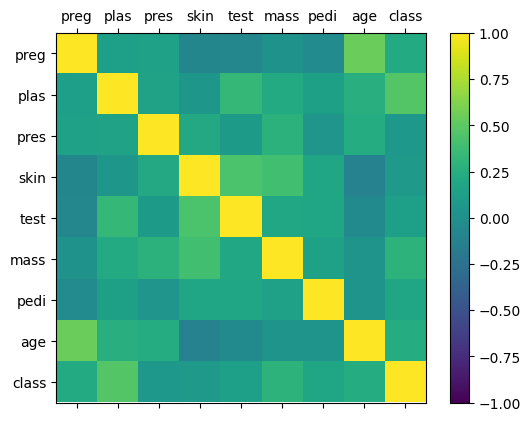

In [43]:
correlations = pima_raw_cleaned.corr()
# plot correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

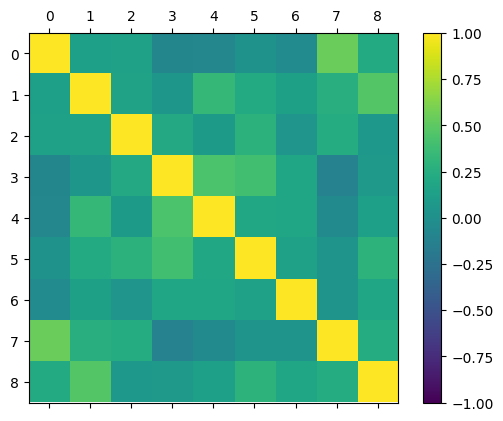

In [44]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=+1)
fig.colorbar(cax)
pyplot.show()

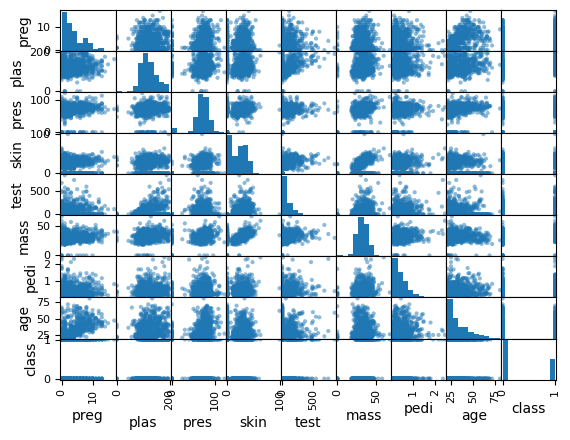

In [46]:
scatter_matrix(pima_raw_cleaned)
pyplot.show()

# measuring skewness

In [48]:
pima_raw_cleaned.skew()

,0
preg,0.901674
plas,0.173754
pres,-1.843608
skin,0.109372
test,2.272251
mass,-0.428982
pedi,1.919911
age,1.129597
class,0.635017


# measuring kurtosis

In [49]:
pima_raw_cleaned.kurt()

,0
preg,0.159220
plas,0.640780
pres,5.180157
skin,-0.520072
test,7.214260
mass,3.290443
pedi,5.594954
age,0.643159
class,-1.600930
